In [24]:
import scanpy as sc
import pandas as pd

In [25]:
file_path = '../../relaxed_epdsc_annotated_data.h5'
adata = sc.read_h5ad(file_path)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../../relaxed_epdsc_annotated_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
adata

AnnData object with n_obs × n_vars = 8007 × 15357
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_raw', 'n_cellbender', 'percent_mito', 'percent_ribo', 'log_lib_size_raw_all', 'log_lib_size_raw_noExcluded', 'log_detected_raw_all', 'log_detected_raw_noExcluded', 'log_lib_size_cellbender_all', 'log_lib_size_cellbender_noExcluded', 'log_detected_cellbender_all', 'log_detected_cellbender_noExcluded', 'n_counts', 'pheno', 'n_genes_by_counts', 'total_counts', 'excluded', 'D30_CTRL_1', 'D30_CTRL_2', 'D30_PIMQ_1', 'D30_PIMQ_2', 'Y1_CTRL_1', 'Y1_CTRL_2', 'Y1_PIMQ_1', 'Y1_PIMQ_2', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'doublet', 'pheno_65', 'pheno_20', 'pheno_25', 'pheno_30', 'pheno_35', 'pheno_40', 'pheno_45', 'pheno_50', 'pheno_55', 'pheno_60', 'pheno_70', 'pheno_75', 'pheno_80', 'pheno_85', 'pheno_90', 'pheno_95', 'pheno_100'

In [ ]:
adata.layers['log1p_data'] = adata.X.copy()
adata.obsm['X_pca_normal'] = adata.obsm['X_pca'].copy()
adata.obsm['X_umap_normal'] = adata.obsm['X_umap'].copy()

adata.X = adata.layers['MAGIC_imputed_data']

In [ ]:
# pca of layer MAGIC
sc.tl.pca(adata)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca')

In [ ]:
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=42)

In [ ]:
adata.obsm['X_pca_magic'] = adata.obsm['X_pca'].copy()
adata.obsm['X_umap_magic'] = adata.obsm['X_umap'].copy()

# remove X_pca and X_umap
del adata.obsm['X_pca']
del adata.obsm['X_umap']

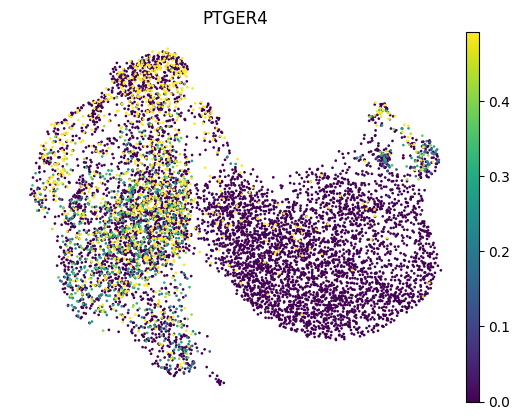

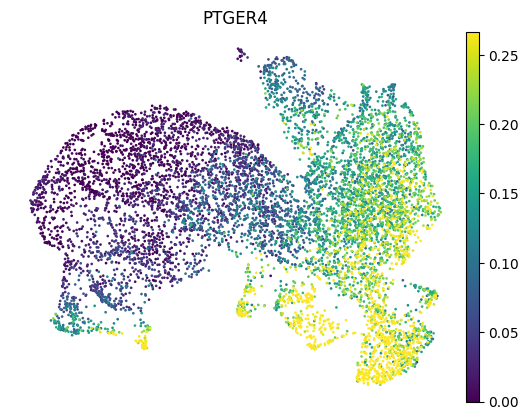

In [ ]:
# compare umaps

sc.pl.embedding(adata, basis='X_umap_normal', color=['PTGER4'], frameon=False, wspace=0.4, layer='log1p_data', vmax='p90')
sc.pl.embedding(adata, basis='X_umap_magic', color=['PTGER4'], frameon=False, wspace=0.4, layer='MAGIC_imputed_data', vmax='p90')

In [ ]:
type(adata.layers['MAGIC_imputed_data'])

numpy.ndarray

In [ ]:
type(adata.layers['log1p_data'])

scipy.sparse._csr.csr_matrix

In [ ]:
# export adata

adata.write_h5ad('../../relaxed_epdsc_annotated_data_magic.h5', compression='gzip')

### scATAC-seq GSE301537

In [ ]:
import scanpy as sc

In [ ]:
import pickle
import gzip

# Load pickle.gz
with gzip.open("../../processed_data2/GSE301537_D30_nrpeakset.pickle.gz", "rb") as f:
    d30_data = pickle.load(f)

with gzip.open("../../processed_data2/GSE301537_Y1_nrpeakset.pickle.gz", "rb") as f:
    y1_data = pickle.load(f)

print(type(d30_data))
print(type(y1_data))

<class 'anndata._core.anndata.AnnData'>
<class 'anndata._core.anndata.AnnData'>


In [ ]:
d30_data

AnnData object with n_obs × n_vars = 143 × 220884
    obs: 'n_counts', 'Condition', 'n_peaks_detected', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'nMonoFrags', 'nDiFrags', 'nMultiFrags', 'nFrags', 'ReadsInPeaks', 'FRIP', 'Size', 'FragmentsPerSize', 'leiden', 'celltype', 'condition_celltype', 'Krt5', 'Krt14', 'Krt1', 'Krt10', 'Sox9', 'glambda_1', 'cutoff_1', 'cutoff_2', 'cutoff_3'
    uns: 'Condition_colors', 'log1p', 'neighbors', 'condition_celltype_colors', 'celltype_colors'
    obsm: 'X_svd', 'X_umap', 'GeneScores'
    layers: 'raw', 'OpenPeaks', 'OpenPeaks_1', 'OpenPeaks_2', 'OpenPeaks_3'
    obsp: 'distances', 'connectivities'

In [ ]:
d30_data.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15208447 stored elements and shape (143, 220884)>

In [ ]:
# import scanpy as sc

d30_data.obsm['GeneScores']

,Mrpl15,Tcea1,Rgs20,Atp6v1h,Rb1cc1,St18,Pcmtd1,Rrs1,Adhfe1,2610203C22Rik,...,Ctps2,Ap1s2,Zrsr2,Siah1b,Pir,Piga,Tceanc,Gm8817,Tmsb4x,Arhgap6
SEACell-0-0,3.657133,3.064654,2.920240,1.853014,3.750728,1.093655,4.125791,4.432436,3.555266,1.370619,...,1.489140,3.075486,3.244998,2.786089,2.606726,2.867266,3.631283,0.00000,0.000000,1.284480
SEACell-1-0,3.233743,3.475376,1.712235,3.134307,3.501829,0.095992,4.601745,4.728814,3.847308,2.210602,...,2.294897,4.097121,3.434204,3.989023,1.928274,4.270214,3.355245,0.00000,0.000000,0.436021
SEACell-2-0,3.708028,3.509205,0.000000,1.923275,3.694157,1.360977,4.622634,4.659280,3.778644,1.991521,...,0.000000,3.267539,2.848488,4.699768,1.933452,3.217809,3.424371,0.00000,0.000000,0.000000
SEACell-3-0,3.424914,2.982900,2.114749,3.215972,3.944200,0.608406,4.249424,4.846488,3.963571,0.000000,...,0.000000,4.202526,3.707763,2.986061,1.933693,2.891344,3.488369,0.00000,0.000000,0.000000
SEACell-4-0,3.497258,3.487369,1.110998,3.791558,3.997659,1.371956,4.487791,4.794550,3.912223,3.415614,...,2.195142,4.037544,3.906590,3.885128,2.341432,3.563140,2.693666,0.37699,0.502088,0.953180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEACell-66-1,3.923236,3.382314,1.960771,3.271863,3.757636,1.233610,4.291125,4.623081,3.743027,0.000000,...,1.872449,4.083352,3.909360,3.225017,0.000000,4.376989,2.844340,0.00000,0.000000,0.000000
SEACell-67-1,4.068271,2.914689,3.239943,2.641600,3.935963,1.259743,4.425195,4.613743,3.733726,1.298829,...,2.301472,2.892037,4.130231,3.953456,3.073410,3.680457,3.415026,0.79292,1.000395,0.000000
SEACell-68-1,3.751907,3.453384,1.913888,3.215221,3.527772,1.454537,4.538088,4.893197,4.009722,2.375844,...,1.145814,3.561335,3.356627,3.462385,2.306191,3.400603,3.903784,0.00000,0.000000,1.336633
SEACell-69-1,3.713508,3.694400,2.634258,2.949926,3.495193,1.487888,4.353143,4.497282,3.619033,2.710173,...,0.923608,3.815089,3.951861,3.108618,2.351681,3.588064,4.187760,0.00000,0.000000,1.061284


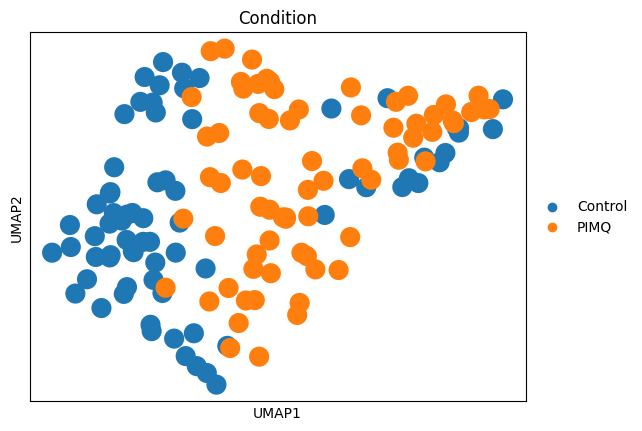

In [ ]:
# sc.tl.umap(d30_data)
sc.pl.umap(d30_data, color=['Condition'])

In [ ]:
y1_data.obsm['GeneScores'].shape

(59, 13436)

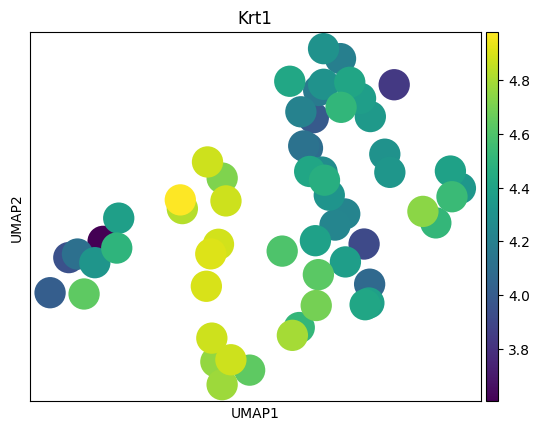

In [ ]:
sc.pl.umap(y1_data, color=['Krt1'])

###  BoneMarrow_May2024

In [ ]:
import scanpy as sc

file_path = '../../processed_data2/BoneMarrow_May2024_outliers_removed_Palantir.h5ad'

adata = sc.read_h5ad(file_path)

In [ ]:
adata

AnnData object with n_obs × n_vars = 75386 × 26708
    obs: 'n_genes_by_counts_prefilter', 'log1p_n_genes_by_counts_prefilter', 'total_counts_prefilter', 'log1p_total_counts_prefilter', 'pct_counts_in_top_50_genes_prefilter', 'pct_counts_in_top_100_genes_prefilter', 'pct_counts_in_top_200_genes_prefilter', 'pct_counts_in_top_500_genes_prefilter', 'Cluster_Fine', 'Cluster_Coarse', 'Annotation', 'Sample', 'Barcode', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'palantir_pseudotime', 'palantir_entropy'
    var: 'n_cells_by_counts_prefilter', 'mean_counts_prefilter', 'log1p_mean_counts_prefilter', 'pct_dropout_by_counts_prefilter', 'total_counts_prefilter', 'log1p_total_counts_prefilter', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_var

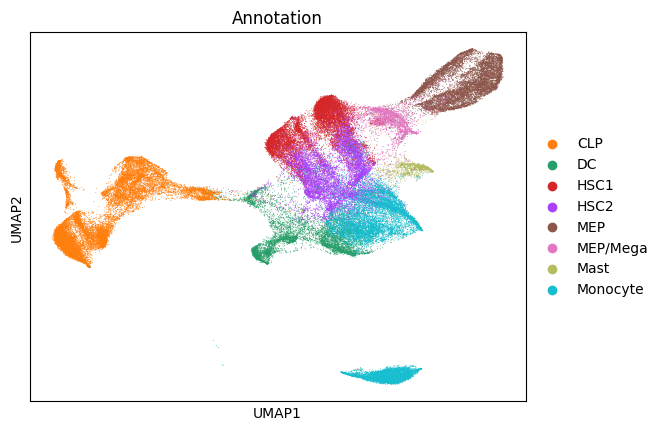

In [ ]:
sc.pl.umap(adata, color=['Annotation'])

In [ ]:
import scanpy as sc

file_path = '../../processed_data2/BoneMarrow_May2024_outliers_removed_atac_adata_genescores.h5ad'

adata = sc.read_h5ad(file_path)

In [ ]:
adata

AnnData object with n_obs × n_vars = 75386 × 24919
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'RNAPhenographClusters', 'ReadsInPeaks', 'FRIP', 'Annotation'
    uns: 'Annotation_colors', 'Sample_colors', 'draw_graph', 'neighbors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [1]:
import anndata as ad
import numpy as np
import pandas as pd
import os

def minimize_adata(
    adata,
    obs_keywords=["sample", "condition", "annotation", "cluster", "phenograph", "qc", "pass", "tsse", "frip", "promoter", "nucleosome"],
    obsm_keywords=["umap", "pca", "draw_graph", "force"],
    layer_keywords=["raw", "log", "magic", "normalized", "counts"],
    include_neighbors=True,
    include_colors=True,
    keep_genes=True,
    exclude_unique_obs=True
):
    # --- Filter obs columns ---
    obs_cols = [col for col in adata.obs.columns if any(k in col.lower() for k in obs_keywords)]
    if exclude_unique_obs:
        obs_cols = [c for c in obs_cols if 1 < adata.obs[c].nunique() < adata.n_obs]

    # --- Detect GeneScores ---
    has_genescores = "GeneScores" in adata.obsm

    # --- Prepare X and var ---
    if keep_genes:
        if has_genescores:
            # Use GeneScores as X
            X = adata.obsm["GeneScores"]
            if hasattr(adata.obsm["GeneScores"], "columns"):
                var = pd.DataFrame(index=adata.obsm["GeneScores"].columns)
            else:
                var = pd.DataFrame(index=[f"Gene_{i}" for i in range(X.shape[1])])
        else:
            X = adata.X.copy()
            var = adata.var.copy()
    else:
        X = np.zeros((adata.n_obs, 0))
        var = pd.DataFrame(index=[])

    adata_min = ad.AnnData(X=X, obs=adata.obs[obs_cols].copy(), var=var)

    # --- Add normalized expression layer ---
    if keep_genes and X.shape[1] > 0:
        log_expr = np.log1p(X.copy())  # natural log(1+x)
        adata_min.layers["log1p_data"] = log_expr  # ensures presence for downstream R
        print(f"✅ Created log1p_data layer: {log_expr.shape}")

    # --- Copy filtered layers (only if shapes match) ---
    for k in adata.layers.keys():
        if any(kw in k.lower() for kw in layer_keywords):
            if adata.layers[k].shape == X.shape:
                adata_min.layers[k] = adata.layers[k]

    # --- Copy embeddings ---
    for k in adata.obsm.keys():
        if k != "GeneScores" and any(kw in k.lower() for kw in obsm_keywords):
            adata_min.obsm[k] = adata.obsm[k]

    # --- Copy neighbors ---
    if include_neighbors:
        if "neighbors" in adata.uns:
            adata_min.uns["neighbors"] = adata.uns["neighbors"].copy()
        for k in ["connectivities", "distances"]:
            if k in adata.obsp:
                adata_min.obsp[k] = adata.obsp[k]

    # --- Copy colors ---
    if include_colors:
        for key in adata.uns.keys():
            if key.endswith("_colors"):
                adata_min.uns[key] = adata.uns[key]

    # --- Copy layout params ---
    for key in ["umap", "draw_graph"]:
        if key in adata.uns:
            adata_min.uns[key] = adata.uns[key]

    return adata_min

def load_adata(file_path):
    ext = os.path.splitext(file_path)[1]

    if ext in [".h5", ".h5ad"]:
        adata = ad.read_h5ad(file_path)
        print(f"📂 Loaded AnnData: {adata.shape}")

    elif ext == ".gz" and file_path.endswith(".pickle.gz"):
        adata = safe_load_pickle(file_path)
        print(f"📦 Loaded AnnData from pickle: {adata.shape}")

    else:
        raise ValueError(f"Unsupported file format: {file_path}")

    return adata


In [2]:
folder_path = '../../processed_data2/'
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


In [11]:

for file_name in file_names:
    if file_name != file_names[1]:
        continue

    print(f"Processing file: {file_name}")

    adata = load_adata(os.path.join(folder_path, file_name))
    print(adata)

    adata_min = minimize_adata(adata)
    print(adata_min)

    out_folder = '../../processed_data2/minimized_adata/'
    os.makedirs(out_folder, exist_ok=True)

    base_name = os.path.splitext(file_name)[0]

    out_file = os.path.join(out_folder, f"minimized_{base_name}.h5ad")
    adata_min.write_h5ad(out_file, compression='gzip')

Processing file: BoneMarrow_May2024_outliers_removed_atac_adata_genescores.h5ad
📂 Loaded AnnData: (75386, 24919)
AnnData object with n_obs × n_vars = 75386 × 24919
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'RNAPhenographClusters', 'ReadsInPeaks', 'FRIP', 'Annotation'
    uns: 'Annotation_colors', 'Sample_colors', 'draw_graph', 'neighbors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'
✅ Created log1p_data layer: (75386, 24919)
AnnData object with n_obs × n_vars = 75386 × 24919
    obs: 'Sample', 'TSSEnrichment', 'ReadsInPromoter', 'PromoterRatio', 'NucleosomeRatio', 'RNAPhenographClusters', 'FRIP', 'Annotation'
    uns: 'neighbors', 'Annotation_colors', 'Sample_colors', 'umap', 'draw_graph'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    layers: 'log1p_data'
    obsp: 'connect

In [12]:
file_names

['relaxed_epdsc_annotated_data.h5',
 'BoneMarrow_May2024_outliers_removed_atac_adata_genescores.h5ad',
 'BoneMarrow_May2024_outliers_removed_Palantir.h5ad',
 'GSE301537_Y1_nrpeakset.pickle.gz',
 'GSE301537_D30_nrpeakset.pickle.gz']

In [6]:
i = 1
adata = load_adata(f'../../processed_data2/{file_names[i]}')
print(file_names[i])
print(adata)

📂 Loaded AnnData: (75386, 24919)
BoneMarrow_May2024_outliers_removed_atac_adata_genescores.h5ad
AnnData object with n_obs × n_vars = 75386 × 24919
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'RNAPhenographClusters', 'ReadsInPeaks', 'FRIP', 'Annotation'
    uns: 'Annotation_colors', 'Sample_colors', 'draw_graph', 'neighbors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'


In [6]:
adata = load_adata(f'../../processed_data2/minimized_adata/minimized_BoneMarrow_May2024_outliers_removed_atac_adata_genescores.h5ad')
print(adata)

📂 Loaded AnnData: (75386, 24919)
AnnData object with n_obs × n_vars = 75386 × 24919
    obs: 'Sample', 'TSSEnrichment', 'ReadsInPromoter', 'PromoterRatio', 'NucleosomeRatio', 'RNAPhenographClusters', 'FRIP', 'Annotation'
    uns: 'Annotation_colors', 'Sample_colors', 'draw_graph', 'neighbors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    layers: 'log1p_data'
    obsp: 'connectivities', 'distances'


In [3]:
adata = load_adata(f'../../processed_data2/minimized_adata/minimized_BoneMarrow_May2024_outliers_removed_Palantir.h5ad')
print("minimized_BoneMarrow_May2024_outliers_removed_Palantir.h5ad")
print(adata)

📂 Loaded AnnData: (75386, 26708)
minimized_BoneMarrow_May2024_outliers_removed_Palantir.h5ad
AnnData object with n_obs × n_vars = 75386 × 26708
    obs: 'Cluster_Fine', 'Cluster_Coarse', 'Annotation', 'Sample'
    var: 'n_cells_by_counts_prefilter', 'mean_counts_prefilter', 'log1p_mean_counts_prefilter', 'pct_dropout_by_counts_prefilter', 'total_counts_prefilter', 'log1p_total_counts_prefilter', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Annotation_colors', 'Cluster_Fine_colors', 'Sample_colors', 'draw_graph', 'neighbors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    layers: 'lognorm_pseudocount.1', 'raw_counts', 'unlogged_normalized'
    obsp: 'connectivities', 'distances'


In [4]:
adata_copy = adata.copy()

del adata

In [6]:
# Remove all layers entirely
adata_copy.layers.clear()

In [8]:
adata_copy.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 125110237 stored elements and shape (75386, 26708)>

In [10]:
import scipy.sparse as sp

# Convert dense layer to sparse CSR before assigning to X
# adata_copy.X = sp.csr_matrix(adata_copy.layers['lognorm_pseudocount.1'])

adata_copy.layers['lognorm_pseudocount.1'] = adata_copy.X.copy()

# Remove var if not needed
del adata_copy.var

# Save minimized object
out_file = '../../processed_data2/minimized_adata/minimized_BoneMarrow_May2024_outliers_removed_Palantir_single_layer.h5ad'
adata_copy.write_h5ad(out_file, compression='gzip')


In [11]:
adata_copy

AnnData object with n_obs × n_vars = 75386 × 26708
    obs: 'Cluster_Fine', 'Cluster_Coarse', 'Annotation', 'Sample'
    uns: 'Annotation_colors', 'Cluster_Fine_colors', 'Sample_colors', 'draw_graph', 'neighbors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    layers: 'lognorm_pseudocount.1'
    obsp: 'connectivities', 'distances'